In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/cell_samples.csv")

In [4]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.columns

(699, 11)

In [6]:
df.shape

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [7]:
df.Class.value_counts() # benign = 2, malignant = 4

Class
2    458
4    241
Name: count, dtype: int64

In [8]:
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

<Axes: xlabel='Clump', ylabel='UnifSize'>

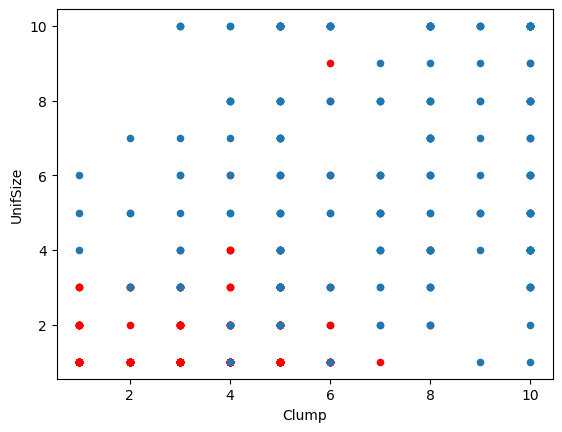

In [9]:
df_benign = df[df['Class'] == 2]
df_malignant = df[df['Class'] == 4]
ax = df_benign.plot(kind='scatter', x='Clump', y='UnifSize', c='red')
df_malignant.plot(kind='scatter', x='Clump', y='UnifSize', ax=ax)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [11]:
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce').notnull()
df['BareNuc'] = df['BareNuc'].astype('int64')

In [12]:
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,1,3,2,1,2
2,1015425,3,1,1,1,2,1,3,1,1,2
3,1016277,6,8,8,1,3,1,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,1,8,10,2,4
697,897471,4,8,6,4,3,1,10,6,1,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           699 non-null    int64
 1   Clump        699 non-null    int64
 2   UnifSize     699 non-null    int64
 3   UnifShape    699 non-null    int64
 4   MargAdh      699 non-null    int64
 5   SingEpiSize  699 non-null    int64
 6   BareNuc      699 non-null    int64
 7   BlandChrom   699 non-null    int64
 8   NormNucl     699 non-null    int64
 9   Mit          699 non-null    int64
 10  Class        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [14]:
df = df.drop('ID', axis=1)
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,1,3,1,1,2
3,6,8,8,1,3,1,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 9), (140, 9), (559,), (140,))

In [19]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [20]:
score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {score}')

report = classification_report(y_test, y_pred)
print(report)